## Ai job trends

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import normaltest
import pingouin as pg
from scipy.stats import skew
from scipy.stats import chi2_contingency

## Premise

The purpose of this is to look at the trends of 

## Brief overview

In [4]:
data = pd.read_csv('ai_job_dataset.csv')

In [5]:
data.head()

,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
0,AI00001,AI Research Scientist,90376,USD,SE,CT,China,M,China,50,"Tableau, PyTorch, Kubernetes, Linux, NLP",Bachelor,9,Automotive,2024-10-18,2024-11-07,1076,5.9,Smart Analytics
1,AI00002,AI Software Engineer,61895,USD,EN,CT,Canada,M,Ireland,100,"Deep Learning, AWS, Mathematics, Python, Docker",Master,1,Media,2024-11-20,2025-01-11,1268,5.2,TechCorp Inc
2,AI00003,AI Specialist,152626,USD,MI,FL,Switzerland,L,South Korea,0,"Kubernetes, Deep Learning, Java, Hadoop, NLP",Associate,2,Education,2025-03-18,2025-04-07,1974,9.4,Autonomous Tech
3,AI00004,NLP Engineer,80215,USD,SE,FL,India,M,India,50,"Scala, SQL, Linux, Python",PhD,7,Consulting,2024-12-23,2025-02-24,1345,8.6,Future Systems
4,AI00005,AI Consultant,54624,EUR,EN,PT,France,S,Singapore,100,"MLOps, Java, Tableau, Python",Master,0,Media,2025-04-15,2025-06-23,1989,6.6,Advanced Robotics


In [12]:
data.job_id.nunique() == len(data)

True

In [9]:
data.remote_ratio.value_counts()

remote_ratio
0      5075
50     5005
100    4920
Name: count, dtype: int64

In [14]:
data.remote_ratio = data.remote_ratio.replace({0:'Onsite',50:'Hybrid',100:'Remote'})

In [15]:
data.experience_level.value_counts()

experience_level
MI    3781
EX    3760
SE    3741
EN    3718
Name: count, dtype: int64

In [6]:
data.isnull().sum().sum()

0

In [7]:
data.shape

(15000, 19)

In [8]:
data.dtypes

job_id                     object
job_title                  object
salary_usd                  int64
salary_currency            object
experience_level           object
employment_type            object
company_location           object
company_size               object
employee_residence         object
remote_ratio                int64
required_skills            object
education_required         object
years_experience            int64
industry                   object
posting_date               object
application_deadline       object
job_description_length      int64
benefits_score            float64
company_name               object
dtype: object

In [9]:
data.job_title.value_counts()

job_title
Machine Learning Researcher    808
AI Software Engineer           784
Autonomous Systems Engineer    777
Machine Learning Engineer      772
AI Architect                   771
Head of AI                     765
NLP Engineer                   762
Robotics Engineer              759
Data Analyst                   759
AI Research Scientist          756
Data Engineer                  749
AI Product Manager             743
Research Scientist             742
Principal Data Scientist       734
AI Specialist                  728
ML Ops Engineer                725
Computer Vision Engineer       724
Data Scientist                 720
Deep Learning Engineer         718
AI Consultant                  704
Name: count, dtype: int64

One thing that we could notice is how well stratified the data is. It is hardly believable that the number of positions requiring a lot of experience and skill are the same as the positions no skills. I will take a look at something else too.

In [17]:
data[data.job_title == "Head of AI"].company_size.value_counts()

company_size
M    283
L    246
S    236
Name: count, dtype: int64

This tells us that small companies might have more "Head of AI" positions than bigger ones which is also hardly believable.

Before jumping into some plots lets transform some data.

In [20]:
data.posting_date = pd.to_datetime(data.posting_date)
data.application_deadline = pd.to_datetime(data.application_deadline)

Now I will separate all the skills so I cam search for positions with specific skills.

In [23]:
skills = data.required_skills.str.split(', ',expand=True)

In [28]:
data.loc[skills[skills[0] =="Deep Learning"].index]

,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
1,AI00002,AI Software Engineer,61895,USD,EN,CT,Canada,M,Ireland,Remote,"Deep Learning, AWS, Mathematics, Python, Docker",Master,1,Media,2024-11-20,2025-01-11,1268,5.2,TechCorp Inc
20,AI00021,Data Engineer,134197,USD,MI,FT,Norway,M,France,Onsite,"Deep Learning, AWS, Azure",Bachelor,3,Telecommunications,2024-06-21,2024-08-28,969,9.6,AI Innovations
30,AI00031,Head of AI,67488,EUR,EN,FT,Netherlands,M,Netherlands,Remote,"Deep Learning, GCP, AWS, Linux, Tableau",Master,1,Retail,2024-05-16,2024-07-26,887,6.0,Advanced Robotics
48,AI00049,AI Specialist,288815,USD,EX,PT,Switzerland,S,Switzerland,Onsite,"Deep Learning, Git, Data Visualization, Linux,...",Bachelor,12,Manufacturing,2024-08-08,2024-09-23,1930,7.2,Cognitive Computing
50,AI00051,AI Architect,70391,EUR,MI,FT,Germany,S,Germany,Onsite,"Deep Learning, SQL, Mathematics",PhD,4,Government,2024-08-16,2024-10-19,1974,9.2,TechCorp Inc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14753,AI14754,Data Engineer,108907,USD,SE,FL,India,L,India,Hybrid,"Deep Learning, Statistics, Azure",Associate,8,Telecommunications,2025-03-11,2025-04-08,1720,9.7,Cloud AI Solutions
14761,AI14762,AI Product Manager,111106,GBP,MI,PT,United Kingdom,L,United Kingdom,Hybrid,"Deep Learning, AWS, Python",PhD,2,Telecommunications,2024-12-13,2025-01-25,1763,5.9,Predictive Systems
14797,AI14798,Head of AI,206490,USD,EX,PT,Finland,L,Finland,Hybrid,"Deep Learning, AWS, Linux, Statistics, SQL",Bachelor,10,Manufacturing,2024-01-21,2024-03-09,1268,8.7,Cognitive Computing
14849,AI14850,Autonomous Systems Engineer,160590,EUR,SE,FT,Germany,L,Germany,Remote,"Deep Learning, R, Statistics, Kubernetes, AWS",PhD,6,Manufacturing,2024-05-08,2024-07-03,1969,8.4,Cloud AI Solutions


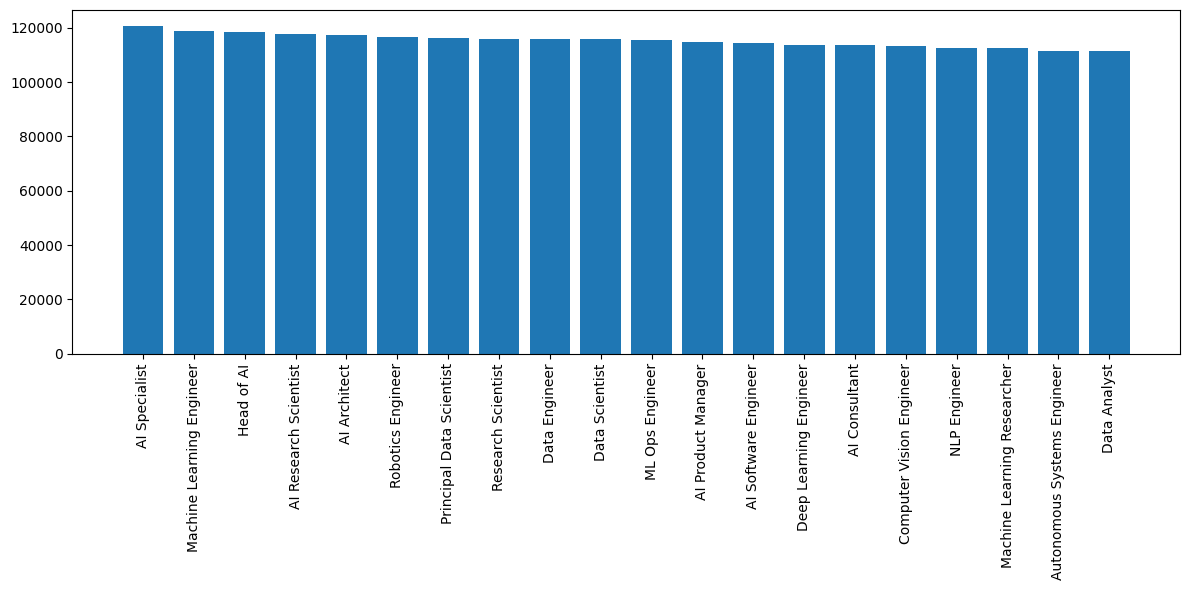

In [10]:
grouped = data.groupby('job_title')['salary_usd'].mean().sort_values(ascending = False)

# Plot
plt.figure(figsize=(12,6))
plt.bar(grouped.index,grouped.values)
plt.xlabel = 'job name'
plt.ylabel = 'average salaty (USD)'
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

## Looking for correlation in the salary-job

What I will do is see if the salary is very much skewed.

<Axes: xlabel='salary_usd', ylabel='Count'>

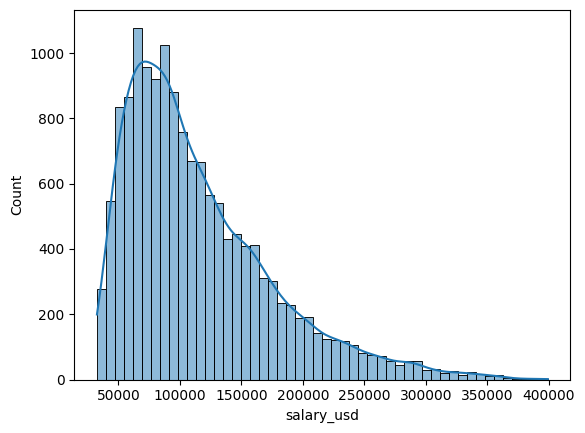

In [11]:
sns.histplot(data['salary_usd'],bins=50,kde=True)

In [12]:
print(data['salary_usd'].mean())
print(data['salary_usd'].mode())


115348.96513333333
0    51000
1    67253
Name: salary_usd, dtype: int64


From the observations above we can see that the distribution of the salary is **rightly skewed**. This means that we will need to take this into consideration when analyzing our data. The difference between the mode and the mean is about in the range of **50-60k** which is significant

<Axes: xlabel='salary_usd'>

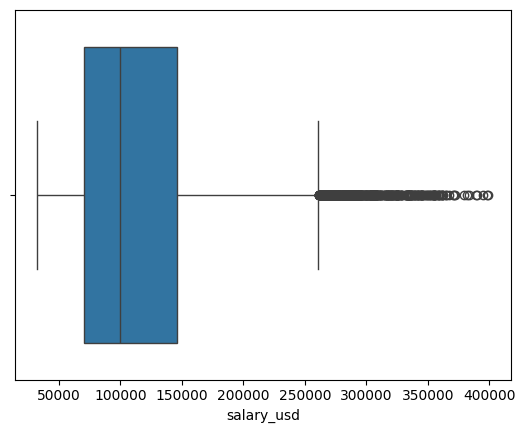

In [13]:
sns.boxplot(x=data['salary_usd'])

From the box plot it is also visible that the mean varies a lot from the mean.

What i will do now is take a deepr look at the correlation between salary and job title.

In [14]:
summary = data.groupby('job_title')['salary_usd'].agg(['count', 'mean', 'median', 'min', 'max']).sort_values(by='median', ascending=False)
print(summary.head(10))


                           count           mean    median    min     max
job_title                                                               
Data Engineer                749  115970.720961  104447.0  33951  359044
Machine Learning Engineer    772  118827.919689  103687.0  34286  344427
AI Specialist                728  120570.758242  103626.5  34174  390292
Head of AI                   765  118542.968627  102025.0  32907  361718
ML Ops Engineer              725  115431.335172  101624.0  33056  352006
AI Consultant                704  113671.870739  101471.0  33959  325757
AI Research Scientist        756  117897.925926  100990.0  33092  394917
Robotics Engineer            759  116470.793149  100714.0  32692  346789
Data Scientist               720  115819.008333  100529.5  32977  388754
AI Architect                 771  117436.513619   99888.0  33220  398084


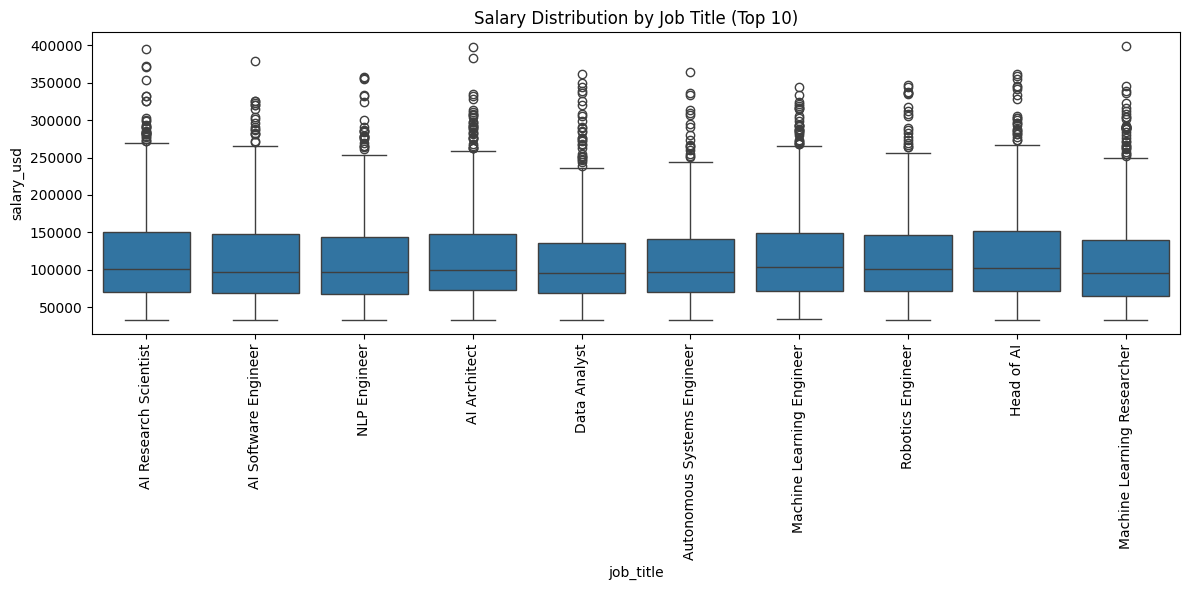

In [15]:
top_jobs = data['job_title'].value_counts().head(10).index
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[data['job_title'].isin(top_jobs)], x='job_title', y='salary_usd')
plt.xticks(rotation=90)
plt.title('Salary Distribution by Job Title (Top 10)')
plt.tight_layout()
plt.show()

before going ahead i want to see if the skewness of the data is actually that much important

In [16]:
from scipy.stats import normaltest

stat, p_value = normaltest(data['salary_usd'])
print(f"Statistic={stat}, p-value={p_value}")
if p_value < 0.05:
    print("Reject null: Data is NOT normally distributed (skewed or other)")
else:
    print("Fail to reject null: Data may be normal")


Statistic=2982.267754005166, p-value=0.0
Reject null: Data is NOT normally distributed (skewed or other)


In [17]:


skewness = skew(data['salary_usd'])
print(f"Skewness: {skewness}")

Skewness: 1.2526339339183783


The data is skewed significantly. When working with it in the future we will have to do a log transformm firstly.


Now what we need to do is to take a **null hypothesis** assuming no relationship between the role and the salary. We are going to first see if there is a homogenity of variances before running ANOVA.

In [18]:
from scipy.stats import levene

groups = [data[data['job_title']==job]['salary_usd'] for job in data['job_title'].unique()]
stat, p_value = levene(*groups)
print(f"Levene’s test p-value: {p_value}")

if p_value < 0.05:
    print("Variances differ, consider Welch's ANOVA")
else:
    print("Variances are equal, standard ANOVA is fine")


Levene’s test p-value: 0.0407092693077582
Variances differ, consider Welch's ANOVA


This tells us that we need to use Welch's ANOVA since the variance of the different groups is too big

In [19]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

model = ols('salary_usd ~ C(job_title)', data=data).fit()
anova_results = anova_lm(model, typ=2, robust='hc3')  # robust test for heteroscedasticity
print(anova_results)

                    sum_sq       df         F    PR(>F)
C(job_title)  9.040820e+10     19.0  1.310873  0.163859
Residual      5.437577e+13  14980.0       NaN       NaN


In [20]:
#second method


welch_results = pg.welch_anova(dv='salary_usd', between='job_title', data=data)
print(welch_results)


      Source  ddof1        ddof2         F     p-unc       np2
0  job_title     19  5512.073571  1.309756  0.164946  0.001677


we see that the probability of such an event is around 16 percent. Therefore we **reject the null hypothesis meaning there is no significant relationship between job title and the salary.

In [21]:
group_stats = data.groupby('job_title')['salary_usd'].agg(['median','std'])

def iqr(series):
    return series.quantile(0.75) - series.quantile(0.25)

group_iqr = data.groupby('job_title')['salary_usd'].apply(iqr)


group_stats["IQR"] = group_iqr

print(group_stats.sort_values(by='median',ascending=False))

                               median           std       IQR
job_title                                                    
Data Engineer                104447.0  57484.893519  77284.00
Machine Learning Engineer    103687.0  62319.113302  78408.00
AI Specialist                103626.5  64677.838666  82793.25
Head of AI                   102025.0  62582.953849  79701.00
ML Ops Engineer              101624.0  59625.346159  76141.00
AI Consultant                101471.0  54325.238938  71416.00
AI Research Scientist        100990.0  64166.702875  80048.25
Robotics Engineer            100714.0  59567.959133  74992.00
Data Scientist               100529.5  60275.140741  73996.50
AI Architect                  99888.0  62061.058583  74801.00
Research Scientist            99446.5  61432.092599  75080.75
AI Product Manager            99434.0  60827.595611  77339.50
Principal Data Scientist      98712.0  61946.978475  77882.50
Deep Learning Engineer        97716.0  61008.516000  73242.50
AI Softw

having this as well we can conclude that there is no significant difference between the salary and the job title of the person

In [22]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# Fit the model
model = ols('salary_usd ~ C(job_title)', data=data).fit()

# Perform ANOVA
anova_results = anova_lm(model, typ=2)

print(anova_results)


                    sum_sq       df         F    PR(>F)
C(job_title)  9.131774e+10     19.0  1.324061  0.155654
Residual      5.437577e+13  14980.0       NaN       NaN


In [23]:

welch_results = pg.welch_anova(dv='salary_usd', between='job_title', data=data)
print(welch_results)


      Source  ddof1        ddof2         F     p-unc       np2
0  job_title     19  5512.073571  1.309756  0.164946  0.001677


Lets run one more non parametric test considering the skewness of the data 

In [24]:
from scipy.stats import kruskal

# Prepare salary groups by job title
groups = [data[data['job_title'] == job]['salary_usd'] for job in data['job_title'].unique()]

# Run Kruskal-Wallis test
stat, p_value = kruskal(*groups)

print(f"Kruskal-Wallis H-test statistic: {stat}")
print(f"Kruskal-Wallis H-test p-value: {p_value}")


Kruskal-Wallis H-test statistic: 21.441412336516542
Kruskal-Wallis H-test p-value: 0.3129307275726608


Here getting an even higher p value indicates that there is indeed no significant importance in the job title.

## Transforming with log

One more thing that we could do is a log transform in order to get rid of the skewed data. I will try to do log transform and see if the data is going to follow the normal distribution.

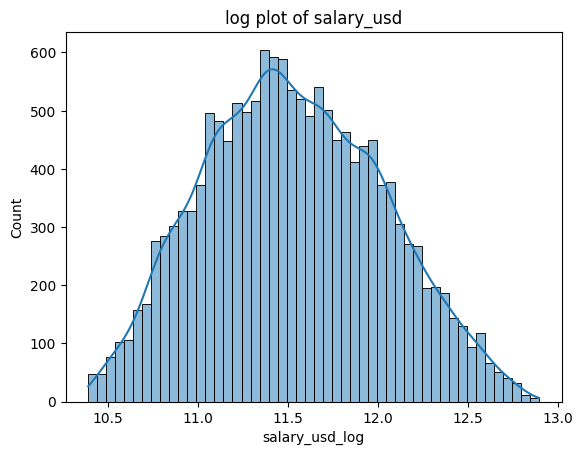

In [56]:
data['salary_usd_log'] = np.log1p(data['salary_usd'])

sns.histplot(data=data,x='salary_usd_log',bins=50,kde=True)
plt.title('log plot of salary_usd')
plt.show()

From the plot above it is visible that in the middle our graph follow a normal distribution. What I will do now is test if now it follows a normal distribution.

In [49]:
stat, p_value = normaltest(data['salary_usd_log'])
print(f"Statistic={stat}, p-value={p_value}")
if p_value < 0.05:
    print("Reject null: Data is NOT normally distributed (skewed or other)")
else:
    print("Fail to reject null: Data may be normal")


Statistic=465.5336985165061, p-value=8.140325990126362e-102
Reject null: Data is NOT normally distributed (skewed or other)


Visibly, the p-value is low and it does not follow the normal distribution. This means that the log transform does not do a good job and the non-parametric approach that we did was a good one. However I will do a Q-Q plot to see what is the problem with the log transform


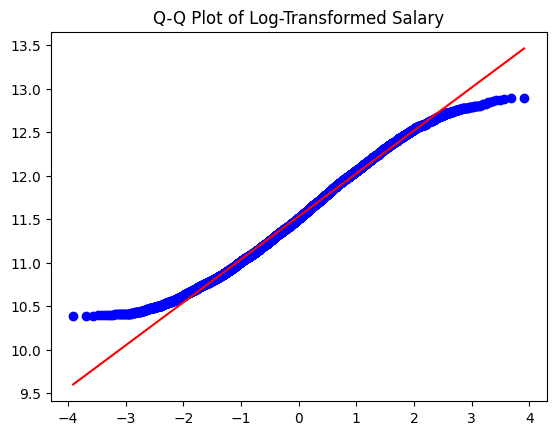

In [53]:
import scipy.stats as stats
log_salary = np.log1p(data['salary_usd'])

stats.probplot(log_salary, dist="norm", plot=plt)
plt.title("Q-Q Plot of Log-Transformed Salary")
plt.show()


We observe that the data is normally distributed in the middle but at the tails not. **It is light tailed.** You can see more about that here [Q-Q plot interpretations](https://i.sstatic.net/2Lfwv.png)

### Conclusion on the correlation

We did not find good correlation between the salary and the position.

## Years of experience to salary

The next thing that might seem obvious is exploring the relationship between years experience and salary

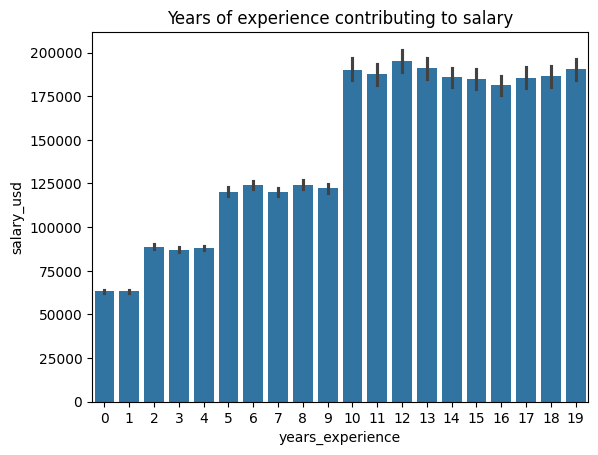

In [26]:
sns.barplot(data=data,x='years_experience',y='salary_usd')
plt.title('Years of experience contributing to salary')
plt.show()


In [27]:
print(data['years_experience'].value_counts().sort_index())


years_experience
0     1890
1     1828
2     1239
3     1247
4     1295
5      757
6      753
7      769
8      720
9      742
10     384
11     373
12     362
13     391
14     364
15     392
16     403
17     363
18     350
19     378
Name: count, dtype: int64


Something interesting appears in the data here. We can see that after the first, fourth and ninth year, there is a leap in the salaries, hitting a platau after that. I am going to observe the biggest leap from 9 to 10 years and see why it might appear.

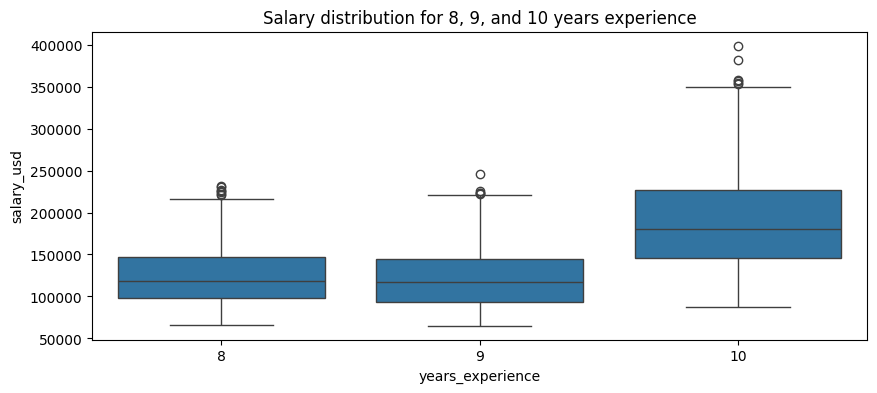

In [28]:
import seaborn as sns

plt.figure(figsize=(10,4))
sns.boxplot(x='years_experience', y='salary_usd', data=data[data['years_experience'].isin([8,9,10])])
plt.title('Salary distribution for 8, 9, and 10 years experience')
plt.show()

In [29]:
corr = data['years_experience'].corr(data['salary_usd'])
print(f"Correlation between years_experience and salary_usd: {corr:.3f}")


Correlation between years_experience and salary_usd: 0.738


### Experience to employment type

It is often assumed that new people at the company cannot begin working on part time. I am going to take a look at the relationship and see if this is true. We are going to begin by forming the null hypothesis that there is no relationship.

<Axes: xlabel='employment_type', ylabel='count'>

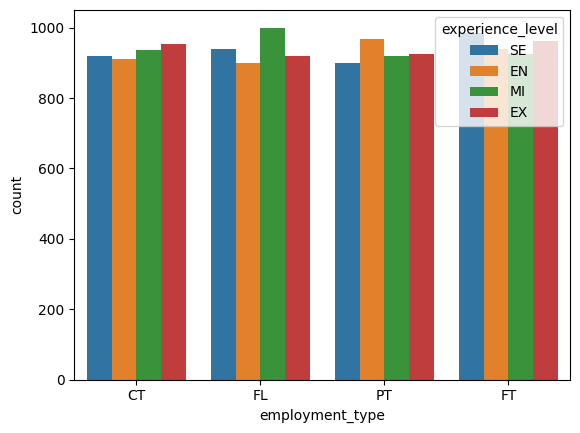

In [37]:
sns.countplot(data=data,x='employment_type',hue='experience_level')

In [39]:
data['employment_type'].unique()

array(['CT', 'FL', 'PT', 'FT'], dtype=object)

In [57]:
data['employment_type'].value_counts()

employment_type
FT    3812
FL    3758
CT    3721
PT    3709
Name: count, dtype: int64

We see that the employment_type the distribution is balanced. Now we will say that the null hypothesis is that there is no relationship between the employment type and the experience level. Now we are going to run **chi-squared test** using ```chi2_contingency``` since the both features are categorical.

In [61]:
contingency_table = pd.crosstab(data['employment_type'], data['experience_level'])

In [62]:
contingency_table

experience_level,EN,EX,MI,SE
employment_type,,,,
CT,912,953,937,919
FL,900,920,1000,938
FT,939,963,924,986
PT,967,924,920,898


In [64]:
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi2 Statistic: {chi2}")
print(f"P-value: {p}")

if p < 0.05:
    print("Reject the null hypothesis: There is a relationship between employment_type and experience_level.")
else:
    print("Fail to reject the null hypothesis: No evidence of a relationship.")

Chi2 Statistic: 11.512197816831561
P-value: 0.24222598447948238
Fail to reject the null hypothesis: No evidence of a relationship.


We fail to reject the null hypothesis and see that such a relationship does not exist.

## Measuring correlation with heatmap

We must first separate the categorical from the numerical values

In [65]:
data.dtypes

job_id                     object
job_title                  object
salary_usd                  int64
salary_currency            object
experience_level           object
employment_type            object
company_location           object
company_size               object
employee_residence         object
remote_ratio                int64
required_skills            object
education_required         object
years_experience            int64
industry                   object
posting_date               object
application_deadline       object
job_description_length      int64
benefits_score            float64
company_name               object
salary_usd_log            float64
dtype: object

In [66]:
numerical_cols = [
    'salary_usd',
    'remote_ratio',
    'years_experience',
    'job_description_length',
    'benefits_score',
    'salary_usd_log'
]

In [67]:
    corr_matrix = data[numerical_cols].corr(method='pearson')
print(corr_matrix)
sns.heatmap(cor)

                        salary_usd  remote_ratio  years_experience  \
salary_usd                1.000000      0.013727          0.737556   
remote_ratio              0.013727      1.000000          0.015321   
years_experience          0.737556      0.015321          1.000000   
job_description_length   -0.009092      0.004475         -0.007526   
benefits_score            0.000985      0.003139         -0.007275   
salary_usd_log            0.957772      0.017191          0.755873   

                        job_description_length  benefits_score  salary_usd_log  
salary_usd                           -0.009092        0.000985        0.957772  
remote_ratio                          0.004475        0.003139        0.017191  
years_experience                     -0.007526       -0.007275        0.755873  
job_description_length                1.000000        0.006744       -0.006820  
benefits_score                        0.006744        1.000000       -0.004366  
salary_usd_log         

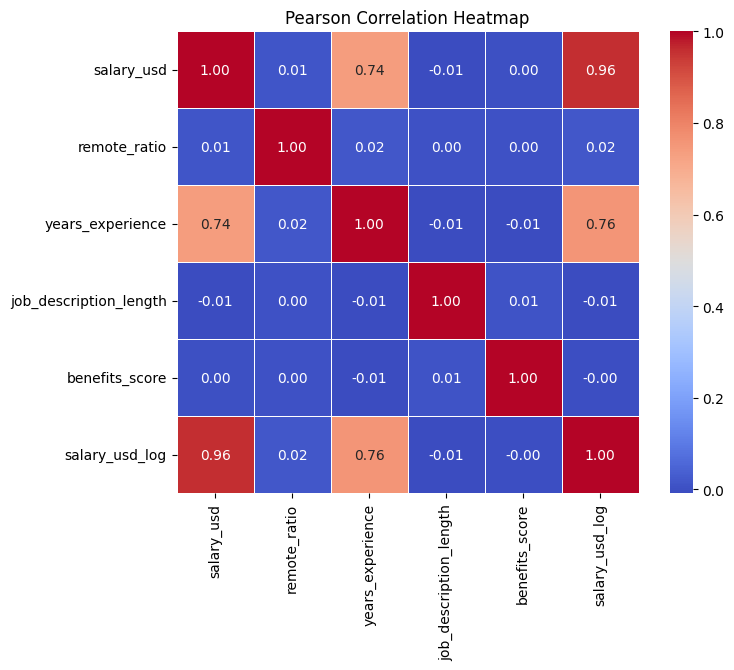

In [68]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True, linewidths=0.5)
plt.title('Pearson Correlation Heatmap')
plt.show()

The only visible relationship that we can see is the one between salary and experience.

## Education required to salary

In [71]:
data['education_required'].unique()

array(['Bachelor', 'Master', 'Associate', 'PhD'], dtype=object)

TypeError: 'str' object is not callable

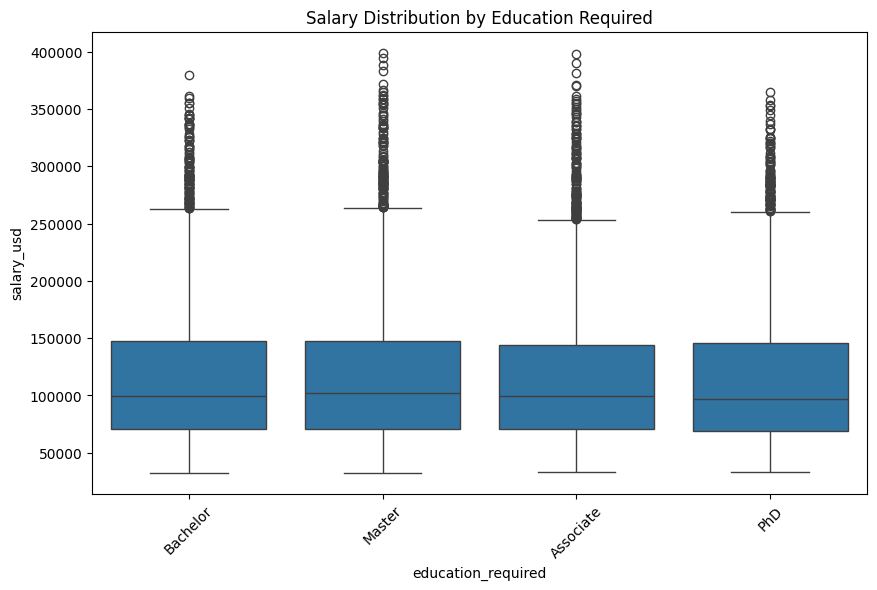

In [73]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='education_required', y='salary_usd')
plt.xticks(rotation=45)
plt.title('Salary Distribution by Education Required')
plt.xlabel('Education Required')
plt.ylabel('Salary (USD)')
plt.show()

In [ ]:
since we have multiple categories accross which we have a numerical variable i will run anova and


In [79]:
groups = [data.loc[data['education_required'] == edu, 'salary_usd'] for edu in data['education_required'].unique()]

h_stat, p_value = stats.kruskal(*groups)

print(f"Kruskal-Wallis H-statistic: {h_stat:.3f}")
print(f"Kruskal-Wallis p-value: {p_value:.3f}")

Kruskal-Wallis H-statistic: 6.748
Kruskal-Wallis p-value: 0.080


In [82]:
groups = [data.loc[data['education_required'] == edu, 'salary_usd_log'] for edu in data['education_required'].unique()]

f_stat, p_value = stats.f_oneway(*groups)

print(f"ANOVA F-statistic: {f_stat:.3f}")
print(f"ANOVA p-value: {p_value:.3f}")

ANOVA F-statistic: 2.138
ANOVA p-value: 0.093


We see that the p-value is not far away from 0.05. Therefore it might be reasonable to run some more tests and do some more exploration of the data to see. To do so I will take a look at outliers.

## Looking at outliers

For this purpose I will try and run two types of tests to see if there are outliers. The first method will be using 3 standart deviations and the second using the IQR

In [74]:

mean_salary = data['salary_usd'].mean()
std_salary = data['salary_usd'].std()

upper_threshold = mean_salary + 3 * std_salary

# Count salaries above this threshold
count_above_3std = (data['salary_usd'] > upper_threshold).sum()

print(f"Mean salary: {mean_salary:.2f}")
print(f"Standard deviation: {std_salary:.2f}")
print(f"Salaries above mean + 3*std ({upper_threshold:.2f}): {count_above_3std}")

Mean salary: 115348.97
Standard deviation: 60260.94
Salaries above mean + 3*std (296131.79): 203


In [76]:
count_above_3std/data.shape[0]*100

1.3533333333333333

In [77]:
Q1 = data['salary_usd'].quantile(0.25)
Q3 = data['salary_usd'].quantile(0.75)
IQR = Q3 - Q1

upper_iqr_threshold = Q3 + 1.5 * IQR
lower_iqr_threshold = Q1 - 1.5 * IQR

# Count salaries above upper IQR threshold
count_above_iqr = (data['salary_usd'] > upper_iqr_threshold).sum()

print(f"Q1: {Q1}")
print(f"Q3: {Q3}")
print(f"IQR: {IQR}")
print(f"Salaries above Q3 + 1.5*IQR ({upper_iqr_threshold}): {count_above_iqr}")


Q1: 70179.75
Q3: 146408.5
IQR: 76228.75
Salaries above Q3 + 1.5*IQR (260751.625): 483


## Going back to the anova

Now that we have taken a look at that we are going to try and remove some outliers seeing if there would be a difference in the p_value

In [83]:
mean_salary = data['salary_usd'].mean()
std_salary = data['salary_usd'].std()
upper_threshold = mean_salary + 3 * std_salary

# Filter data to exclude outliers
filtered_data = data[data['salary_usd'] <= upper_threshold]

# Group salaries by education in filtered data
groups_filtered = [filtered_data.loc[filtered_data['education_required'] == edu, 'salary_usd'] 
                   for edu in filtered_data['education_required'].unique()]

# Run Kruskal-Wallis test on filtered data
h_stat_filtered, p_value_filtered = stats.kruskal(*groups_filtered)

print(f"Kruskal-Wallis H-statistic (filtered): {h_stat_filtered:.3f}")
print(f"Kruskal-Wallis p-value (filtered): {p_value_filtered:.3f}")


Kruskal-Wallis H-statistic (filtered): 5.175
Kruskal-Wallis p-value (filtered): 0.159


What we observe from that is probably the relationship between the salaries and the degree are in the higher salaries.
What we could try to do is take those outliers and see if we could reject the null hypothesis.

In [84]:
# Filter for outliers only
outliers = data[data['salary_usd'] > upper_threshold]

# Group salaries by education
groups_outliers = [outliers.loc[outliers['education_required'] == edu, 'salary_usd'] 
                   for edu in outliers['education_required'].unique()]

# Run Kruskal-Wallis test
h_stat_outliers, p_value_outliers = stats.kruskal(*groups_outliers)

print(f"H-statistic (outliers): {h_stat_outliers:.3f}")
print(f"p-value (outliers): {p_value_outliers:.3f}")

H-statistic (outliers): 4.372
p-value (outliers): 0.224


However we see that even at the top earners the education does not play a big role.

In [95]:
data['company_name'].nunique()


16

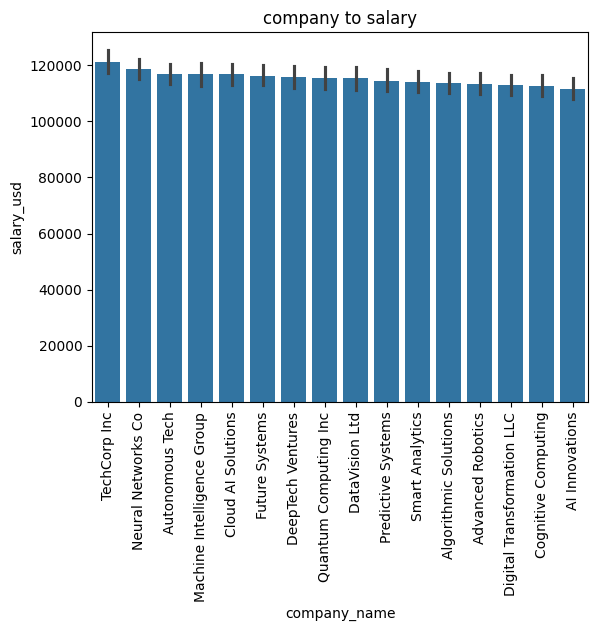

In [101]:
mean_salary = data.groupby('company_name')['salary_usd'].mean().sort_values(ascending=False)
sns.barplot(data=data,x='company_name',y='salary_usd',order=mean_salary.index)
plt.title('company to salary')
plt.xticks(rotation=90)
plt.show()

In [102]:
from scipy.stats import kruskal

# Prepare salary groups per company
groups = [group['salary_usd'].values for name, group in data.groupby('company_name')]

# Run the test
h_stat, p_value = kruskal(*groups)

print(f"H-statistic: {h_stat:.3f}")
print(f"p-value: {p_value:.3f}")

H-statistic: 22.078
p-value: 0.106


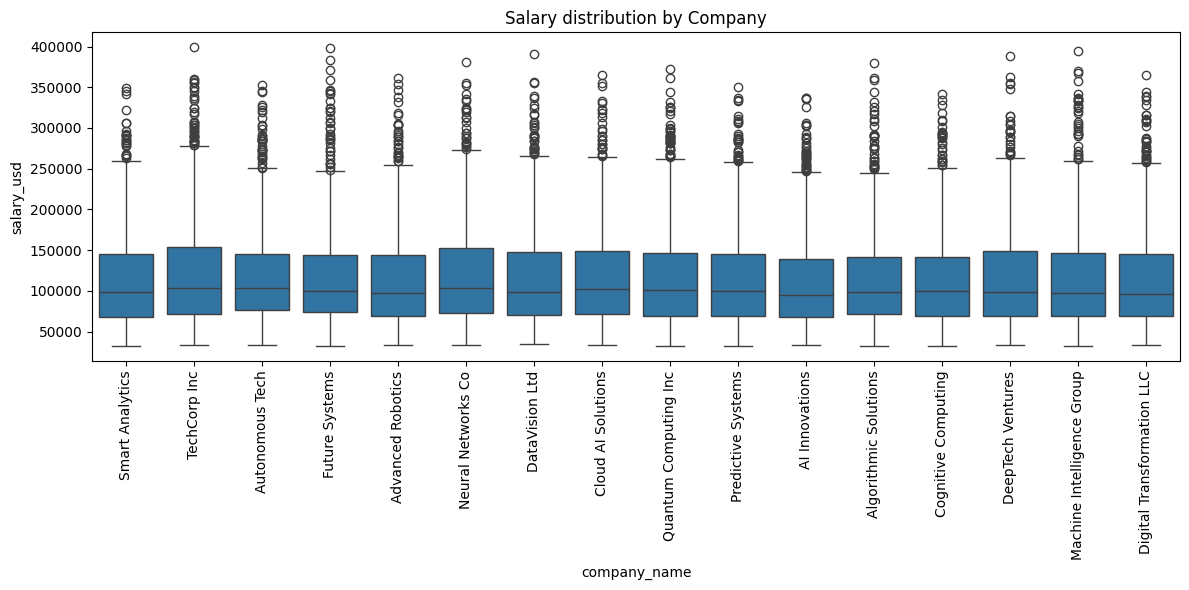

In [105]:

plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='company_name', y='salary_usd')
plt.xticks(rotation=90)
plt.title("Salary distribution by Company")
plt.tight_layout()
plt.show()

We could say that there is a mild trend.